In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# load intermediate results
df_l = pd.read_csv('./result/df_l.csv')
df_r = pd.read_csv('./result/df_r.csv')
df_l3 = pd.read_csv('./result/df_l3.csv')
df_thd = pd.read_csv('./result/df_thd.csv')
df_novel_l3 = pd.read_csv('./result/df_novel_l3.csv')

# Hypothesis testing

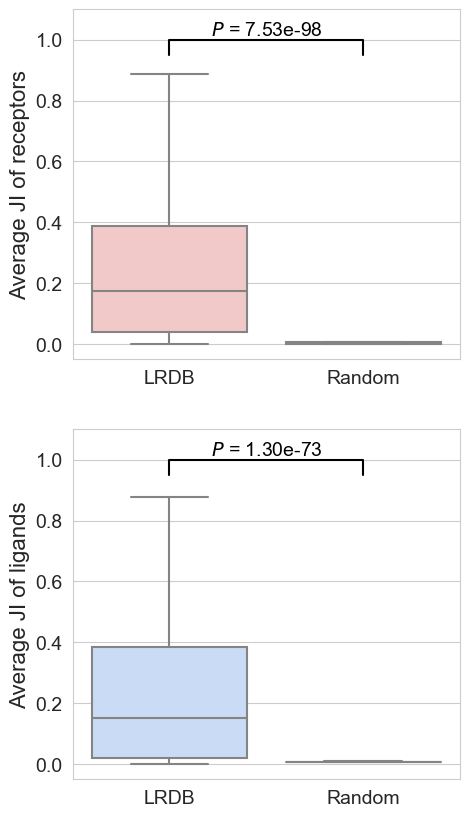

In [3]:
def rgb2tuple(rgb_ls):
    return [x / 255.0 for x in rgb_ls]

fig, axes = plt.subplot_mosaic(
    """
    A
    B
    """
    ,
    figsize=(5, 10), constrained_layout=False)
labelsize = 16
ticksize = 14
legendsize = 14
txtsize = 14
boxline = 1.5
#######################################
ax0, ax1 = axes['A'], axes['B']
my_palette = ['#f7c3c1', '#c2dafc']
sns.boxplot(df_l, ax=ax0, palette=my_palette, showfliers=False, linewidth=boxline)
my_palette = my_palette[::-1]
sns.boxplot(df_r, ax=ax1, palette=my_palette, showfliers=False, linewidth=boxline)

def draw_one(ax, p_value):
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    x1, x2 = 0, 1
    y, h, col = 0.95, 0.05, 'k'
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=boxline, c=col)
    ax.text((x1+x2)*.5, y+h, "$P$ = {:.2e}".format(p_value), ha='center', va='bottom', color=col, fontsize=txtsize)
    ax.set_ylim(-0.05, 1.1)


p_l = ttest_ind(df_l['LRDB'], df_l['Random'], random_state=42, alternative='greater')[1]
p_r = ttest_ind(df_r['LRDB'], df_r['Random'], random_state=42, alternative='greater')[1]
draw_one(ax0, p_l)
draw_one(ax1, p_r)

ax0.set_ylabel("Average JI of receptors", size=labelsize)
ax1.set_ylabel("Average JI of ligands", size=labelsize)

plt.show()

# Effect of the JI threshold and L3 threshold

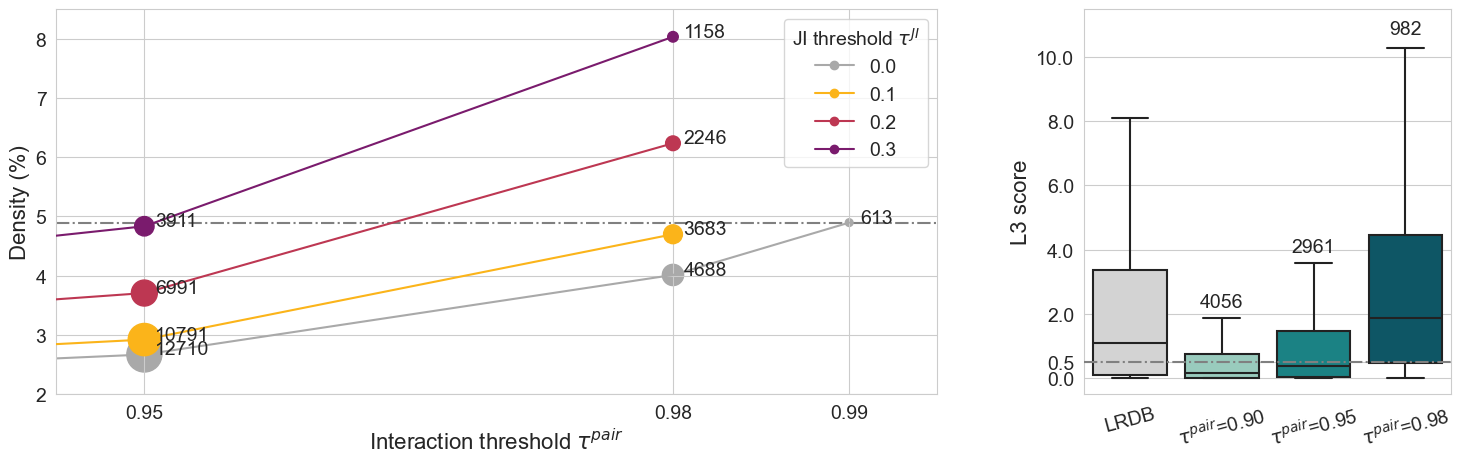

In [4]:
fig, axes = plt.subplot_mosaic(
    """
    DDE
    """
    ,
    figsize=(18,5), constrained_layout=False)
labelsize = 16
ticksize = 14
legendsize = 14
txtsize = 14
boxline = 1.5
#######################################
def draw_density(ax):
    def draw_one(ax, thd, color, zorder):
        amp = 0.05
        pairs = df_thd.query(f'topo_thd == {thd}')['num'].values
        densities = df_thd.query(f'topo_thd == {thd}')['density'].values
        ax.scatter(pred_thd_ls, densities, color=color, s=amp*pairs, zorder=zorder)
        ax.plot(pred_thd_ls, densities, color=color, zorder=zorder+1)
        for i, d in enumerate(pairs):
            ax.annotate('{:d}'.format(d), (pred_thd_ls[i]+0.0006, densities[i]), size=txtsize, zorder=zorder+10)

        ax.plot([], [], '-o', c=color, label='{:.1f}'.format(thd))

    pred_thd_ls = [0.5, 0.7, 0.9, 0.95, 0.98, 0.99]
    draw_one(ax, thd=0, color=my_palette[0], zorder=0)

    pred_thd_ls = [0.5, 0.7, 0.9, 0.95, 0.98]
    draw_one(ax, thd=0.1, color=my_palette[1], zorder=2)
    draw_one(ax, thd=0.2, color=my_palette[2], zorder=4)
    draw_one(ax, thd=0.3, color=my_palette[3], zorder=6)

    ax.axhline(y=df_thd.query(f'topo_thd == 0')['density'].values[-1], color='grey', linestyle = '-.', zorder=-1)
    ax.set_xticks([0.5, 0.7, 0.9, 0.95, 0.98, 0.99])
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    ax.set_xlabel("Interaction threshold $\\tau^{pair}$", size=labelsize)
    ax.set_ylabel("Density (%)", size=labelsize)
    ax.legend(title='JI threshold $\\tau^{JI}$', fontsize=legendsize, title_fontsize=legendsize)

my_palette = ['darkgrey'] + [rgb2tuple([251, 180, 26]), rgb2tuple([189, 55, 82]), rgb2tuple([122, 27, 109])]

ax = axes['D']
draw_density(ax)
ax.set_ylim(2, 8.5)
ax.set_xlim(0.945, 0.995)



#######################################
ax = axes['E']
my_palette = ['lightgray'] + [rgb2tuple([145, 211, 192]), rgb2tuple([9, 147, 150]), rgb2tuple([0, 96, 115])]
df_ = pd.DataFrame.from_dict(
    {'LRDB': df_l3['edge'].dropna().values,
     '0.9': df_novel_l3.query('pred > 0.9')['l3'].values,
     '0.95': df_novel_l3.query('pred > 0.95')['l3'].values,
     '0.98':df_novel_l3.query('pred > 0.98')['l3'].values},  orient='index').T

sns.boxplot(df_, ax=ax, palette=my_palette, showfliers=False, linewidth=boxline)

ax.axhline(y=0.5, color='grey', linestyle = '-.', zorder=10)
ax.text(1, 2.1, "{}".format(len(df_novel_l3.query('pred > 0.9 and l3 > 0.5'))), ha='center', va='bottom', fontsize=txtsize)
ax.text(2, 3.8, "{}".format(len(df_novel_l3.query('pred > 0.95 and l3 > 0.5'))), ha='center', va='bottom', fontsize=txtsize)
ax.text(3, 10.6, "{}".format(len(df_novel_l3.query('pred > 0.98 and l3 > 0.5'))), ha='center', va='bottom', fontsize=txtsize)

ax.set_xticklabels(['LRDB', '$\\tau^{pair}$=0.90', '$\\tau^{pair}$=0.95', '$\\tau^{pair}$=0.98'])
ax.set_ylabel("L3 score", size=labelsize)
ax.tick_params(axis='both', which='major', labelsize=ticksize)
ax.tick_params(axis='x', rotation=15)
ax.set_ylim(-0.5, 11.5)
ax.set_yticks([0, 0.5, 2, 4, 6, 8, 10])

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

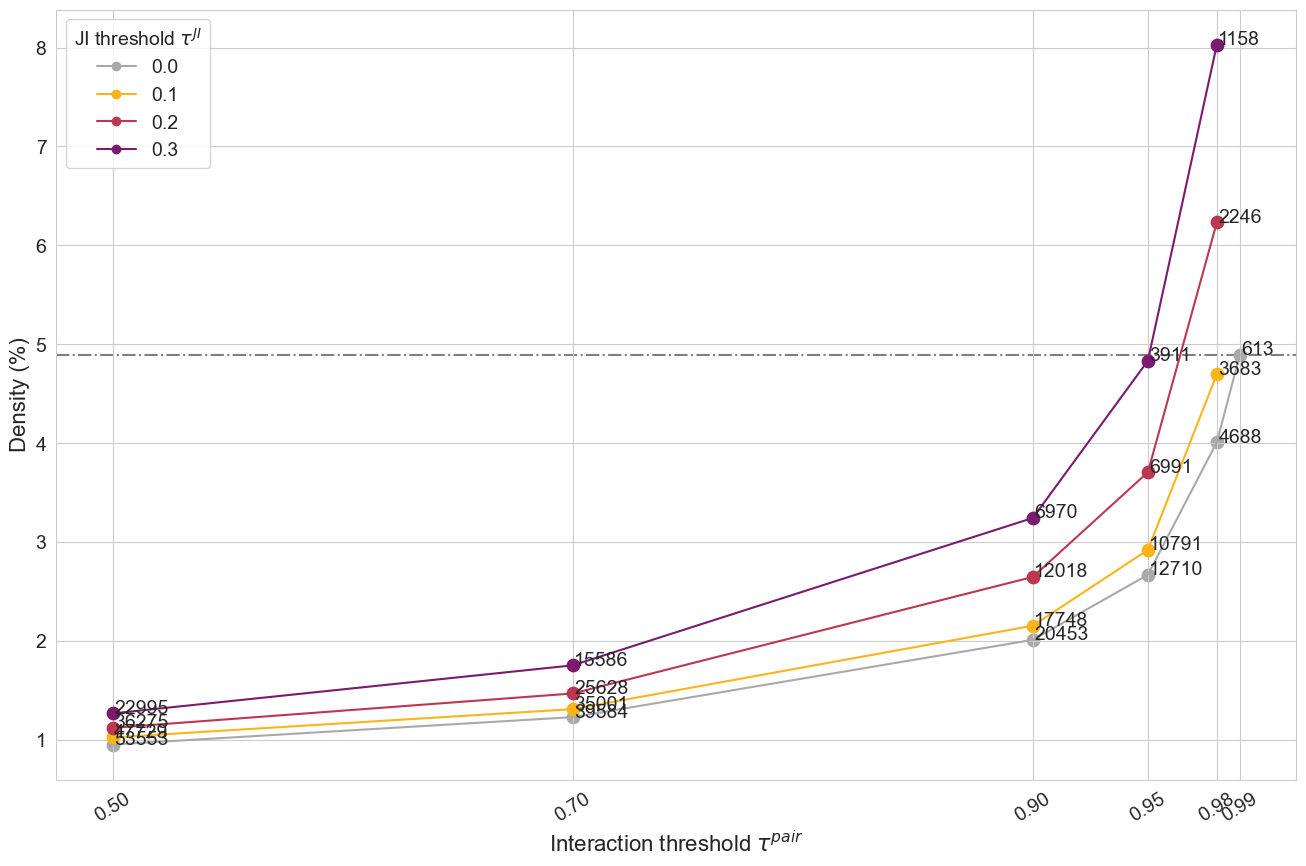

In [5]:
fig, axes = plt.subplot_mosaic(
    """
    D
    """
    ,
    figsize=(16,10), constrained_layout=False)
labelsize = 16
ticksize = 14
legendsize = 14
txtsize = 14
boxline = 1.5
def draw_density(ax):
    def draw_one(ax, thd, color, zorder):
        amp = 0.05
        pairs = df_thd.query(f'topo_thd == {thd}')['num'].values
        densities = df_thd.query(f'topo_thd == {thd}')['density'].values
        ax.scatter(pred_thd_ls, densities, color=color, s=80, zorder=zorder)
        # ax.scatter(pred_thd_ls, densities, color=color, s=100)
        ax.plot(pred_thd_ls, densities, color=color, zorder=zorder+1)
        for i, d in enumerate(pairs):
            ax.annotate('{:d}'.format(d), (pred_thd_ls[i]+0.0006, densities[i]), size=txtsize, zorder=zorder+10)

        ax.plot([], [], '-o', c=color, label='{:.1f}'.format(thd))

    pred_thd_ls = [0.5, 0.7, 0.9, 0.95, 0.98, 0.99]
    draw_one(ax, thd=0, color=my_palette[0], zorder=0)

    pred_thd_ls = [0.5, 0.7, 0.9, 0.95, 0.98]
    draw_one(ax, thd=0.1, color=my_palette[1], zorder=2)
    draw_one(ax, thd=0.2, color=my_palette[2], zorder=4)
    draw_one(ax, thd=0.3, color=my_palette[3], zorder=6)

    ax.axhline(y=df_thd.query(f'topo_thd == 0')['density'].values[-1], color='grey', linestyle = '-.', zorder=-1)
    ax.set_xticks([0.5, 0.7, 0.9, 0.95, 0.98, 0.99])
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    ax.set_xlabel("Interaction threshold $\\tau^{pair}$", size=labelsize)
    ax.set_ylabel("Density (%)", size=labelsize)
    ax.legend(title='JI threshold $\\tau^{JI}$', fontsize=legendsize, title_fontsize=legendsize)
    # ax.ticklabel_format(style='sci',scilimits=(0,4), axis='y')

my_palette = ['darkgrey'] + [rgb2tuple([251, 180, 26]), rgb2tuple([189, 55, 82]), rgb2tuple([122, 27, 109])]

ax = axes['D']
draw_density(ax)
ax.tick_params(axis='x', rotation=32)


plt.show()